In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
import geopandas as gpd

# Especifica la ruta y nombre del archivo GeoJSON que creaste previamente
archivo_geojson = r'C:\Users\Ricardo\Desktop\ASIES-Herramientas cuantitativas\TF\PeryPob2020.geojson'

# Lee el archivo GeoJSON como un GeoDataFrame
PeryPob2022 = gpd.read_file(archivo_geojson)

In [3]:
PeryPob2022

,FIRST_NOMB,MIN_SHAPE_,ha,PROVINCIAS,Médico,Enfermero,Obstetra,Técnicos Especializados,Profesional Asistencial no especificado,TOTAL,POBLACION 2020,profesionalesx100mil,geometry
0,APURIMAC,3.458273e+05,345827.34,ABANCAY,195,435,123,0,0,753,120116,626.894002,"POLYGON ((-72.77286 -13.44888, -72.74545 -13.4..."
1,HUANCAVELICA,9.263674e+04,92636.74,ACOBAMBA,44,84,79,0,0,207,37503,551.955844,"POLYGON ((-74.32362 -12.83251, -74.31945 -12.8..."
2,CUSCO,9.328581e+04,93285.81,ACOMAYO,22,33,22,0,0,77,24000,320.833333,"POLYGON ((-71.51688 -13.96722, -71.44034 -14.1..."
3,ANCASH,6.963963e+04,69639.63,AIJA,6,5,8,0,0,19,6433,295.352091,"POLYGON ((-77.96140 -9.78024, -77.86786 -9.763..."
4,LORETO,1.917213e+06,1917212.66,ALTO AMAZONAS,110,164,133,1,0,408,149892,272.195981,"POLYGON ((-76.28970 -3.69122, -76.24529 -3.751..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,LIMA,6.990514e+05,699051.38,YAUYOS,23,42,33,0,0,98,19665,498.347318,"POLYGON ((-75.96140 -13.00138, -75.95743 -12.9..."
185,ANCASH,1.364843e+05,136484.28,YUNGAY,24,62,44,0,0,130,55769,233.104413,"POLYGON ((-78.05610 -9.27470, -78.03717 -9.243..."
186,PUNO,4.206501e+04,42065.01,YUNGUYO,34,87,27,0,0,148,37116,398.749865,"MULTIPOLYGON (((-68.91839 -16.40372, -68.91840..."
187,TUMBES,7.581930e+04,75819.30,ZARUMILLA,28,56,33,0,0,117,56038,208.786895,"POLYGON ((-80.18074 -3.92583, -80.24359 -3.897..."


In [4]:
PeryPob2022.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   FIRST_NOMB                               189 non-null    object  
 1   MIN_SHAPE_                               189 non-null    float64 
 2   ha                                       189 non-null    float64 
 3   PROVINCIAS                               189 non-null    object  
 4   Médico                                   189 non-null    int64   
 5   Enfermero                                189 non-null    int64   
 6   Obstetra                                 189 non-null    int64   
 7   Técnicos Especializados                  189 non-null    int64   
 8   Profesional Asistencial no especificado  189 non-null    int64   
 9   TOTAL                                    189 non-null    int64   
 10  POBLACION 2020                

In [5]:
PeryPob2022.profesionalesx100mil.describe()

count    189.000000
mean     350.247392
std      139.260046
min       87.510047
25%      242.126665
50%      325.203252
75%      436.826099
max      911.708253
Name: profesionalesx100mil, dtype: float64

<Axes: >

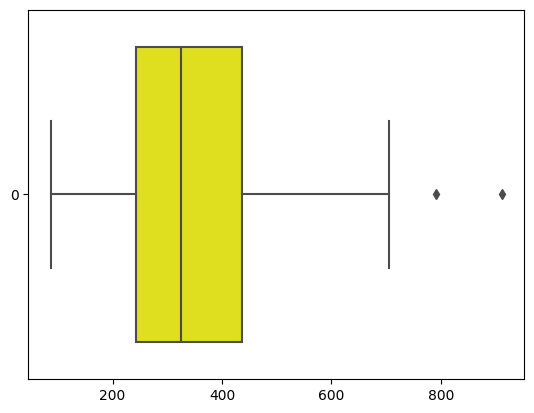

In [10]:
import seaborn as sea

sea.boxplot(PeryPob2022.profesionalesx100mil, color='yellow',orient='h')

<Axes: >

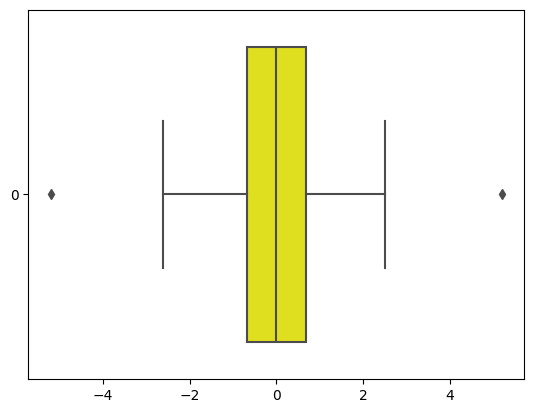

In [11]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=100, random_state=0,output_distribution='normal')
qt_result=qt.fit_transform(PeryPob2022[['profesionalesx100mil']])
sea.boxplot(qt_result, color='yellow',orient='h')

In [12]:
PeryPob2022['profx100_qt']=qt_result

In [13]:
PeryPob2022

,FIRST_NOMB,MIN_SHAPE_,ha,PROVINCIAS,Médico,Enfermero,Obstetra,Técnicos Especializados,Profesional Asistencial no especificado,TOTAL,POBLACION 2020,profesionalesx100mil,geometry,profx100_qt
0,APURIMAC,3.458273e+05,345827.34,ABANCAY,195,435,123,0,0,753,120116,626.894002,"POLYGON ((-72.77286 -13.44888, -72.74545 -13.4...",1.679401
1,HUANCAVELICA,9.263674e+04,92636.74,ACOBAMBA,44,84,79,0,0,207,37503,551.955844,"POLYGON ((-74.32362 -12.83251, -74.31945 -12.8...",1.339225
2,CUSCO,9.328581e+04,93285.81,ACOMAYO,22,33,22,0,0,77,24000,320.833333,"POLYGON ((-71.51688 -13.96722, -71.44034 -14.1...",-0.045560
3,ANCASH,6.963963e+04,69639.63,AIJA,6,5,8,0,0,19,6433,295.352091,"POLYGON ((-77.96140 -9.78024, -77.86786 -9.763...",-0.209198
4,LORETO,1.917213e+06,1917212.66,ALTO AMAZONAS,110,164,133,1,0,408,149892,272.195981,"POLYGON ((-76.28970 -3.69122, -76.24529 -3.751...",-0.384879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,LIMA,6.990514e+05,699051.38,YAUYOS,23,42,33,0,0,98,19665,498.347318,"POLYGON ((-75.96140 -13.00138, -75.95743 -12.9...",1.159148
185,ANCASH,1.364843e+05,136484.28,YUNGAY,24,62,44,0,0,130,55769,233.104413,"POLYGON ((-78.05610 -9.27470, -78.03717 -9.243...",-0.871186
186,PUNO,4.206501e+04,42065.01,YUNGUYO,34,87,27,0,0,148,37116,398.749865,"MULTIPOLYGON (((-68.91839 -16.40372, -68.91840...",0.458583
187,TUMBES,7.581930e+04,75819.30,ZARUMILLA,28,56,33,0,0,117,56038,208.786895,"POLYGON ((-80.18074 -3.92583, -80.24359 -3.897...",-1.210583


In [14]:
PeryPob2022.geometry.describe()

count                                                   189
unique                                                  189
top       POLYGON ((-72.77286310729582 -13.4488806061573...
freq                                                      1
Name: geometry, dtype: object

In [15]:
from libpysal.weights import Queen, Rook, KNN

In [16]:
#geom_col = 'geometry'
w_queen = Queen.from_dataframe(PeryPob2022, geom_col="geometry", use_index=False)

In [33]:
w_knn = KNN.from_dataframe(PeryPob2022, k=8)

In [17]:
PeryPob2022.head()

,FIRST_NOMB,MIN_SHAPE_,ha,PROVINCIAS,Médico,Enfermero,Obstetra,Técnicos Especializados,Profesional Asistencial no especificado,TOTAL,POBLACION 2020,profesionalesx100mil,geometry,profx100_qt
0,APURIMAC,3.458273e+05,345827.34,ABANCAY,195,435,123,0,0,753,120116,626.894002,"POLYGON ((-72.77286 -13.44888, -72.74545 -13.4...",1.679401
1,HUANCAVELICA,9.263674e+04,92636.74,ACOBAMBA,44,84,79,0,0,207,37503,551.955844,"POLYGON ((-74.32362 -12.83251, -74.31945 -12.8...",1.339225
2,CUSCO,9.328581e+04,93285.81,ACOMAYO,22,33,22,0,0,77,24000,320.833333,"POLYGON ((-71.51688 -13.96722, -71.44034 -14.1...",-0.045560
3,ANCASH,6.963963e+04,69639.63,AIJA,6,5,8,0,0,19,6433,295.352091,"POLYGON ((-77.96140 -9.78024, -77.86786 -9.763...",-0.209198
4,LORETO,1.917213e+06,1917212.66,ALTO AMAZONAS,110,164,133,1,0,408,149892,272.195981,"POLYGON ((-76.28970 -3.69122, -76.24529 -3.751...",-0.384879


In [18]:
w_queen.neighbors[0]

[16, 101, 6, 8, 9, 74, 62]

<Axes: >

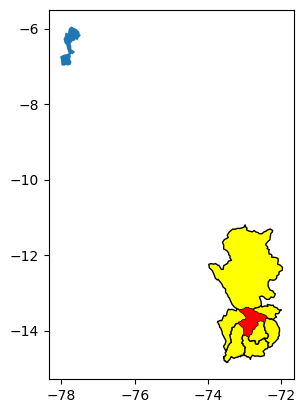

In [22]:
base=PeryPob2022[PeryPob2022.PROVINCIAS=="CHACHAPOYAS"].plot()
PeryPob2022.iloc[w_queen.neighbors[0] ,].plot(ax=base,facecolor="yellow",edgecolor='k')
PeryPob2022.head(1).plot(ax=base,facecolor="red")

In [23]:
w_queen.neighbors

{0: [16, 101, 6, 8, 9, 74, 62],
 1: [55, 83, 85, 7],
 2: [145, 53, 134, 30, 31],
 3: [88, 146, 90],
 4: [66, 147, 104, 153, 123, 110],
 5: [128, 65, 86, 135, 107],
 6: [0, 101, 165, 102, 133, 111, 16, 50, 181],
 7: [1, 83, 85, 94, 79],
 8: [0, 178, 101, 134, 62, 63],
 9: [0, 16, 133, 53, 103, 74, 62],
 10: [89, 75, 39],
 11: [97, 72, 43, 156, 29],
 12: [175, 73, 59, 125, 127],
 13: [89, 185, 38, 39],
 14: [113, 162, 101, 168, 170, 60, 126],
 15: [81, 122, 141, 166],
 16: [0, 9, 133, 6],
 17: [82, 36, 150, 120, 106, 156],
 18: [179, 188, 151],
 19: [90, 124, 22, 92],
 20: [177, 115, 69, 139, 108, 77, 174],
 21: [152, 115, 157, 136, 24, 44, 45],
 22: [67, 90, 107, 78, 146, 19, 89, 26, 124],
 23: [112, 66, 179, 148, 123, 188, 45],
 24: [21, 157, 152, 73, 125, 25],
 25: [59, 152, 73, 155, 44, 24, 76],
 26: [107, 124, 22, 92],
 27: [145, 178, 113, 101, 138, 63],
 28: [109],
 29: [97, 37, 41, 11, 43, 57],
 30: [2, 53, 70, 120, 31],
 31: [145, 2, 36, 120, 30],
 32: [99, 68, 117, 167, 171],
 3

In [25]:
# the matrix of neighboorhood:

pd.DataFrame(*w_queen.full()).astype(int) # 1 means both are neighbors

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
w_queen.pct_nonzero

2.7714789619551525

In [27]:
w_queen.islands

[]

## Moran's correlation

In [ ]:
w_queen.transform = 'R'

In [ ]:
pd.DataFrame(*w_queen.full()).sum(axis=1) # 1 means both are neighbors normalizas del 0 al 1 

In [29]:
from esda.moran import Moran
moranPer= Moran(PeryPob2022['profx100_qt'], w_queen)
moranPer.I,moranPer.p_sim

(0.296051877404541, 0.001)

Text(0, 0.5, 'tasa de incidencia promedio de especialistas en las áreas vecinas ')

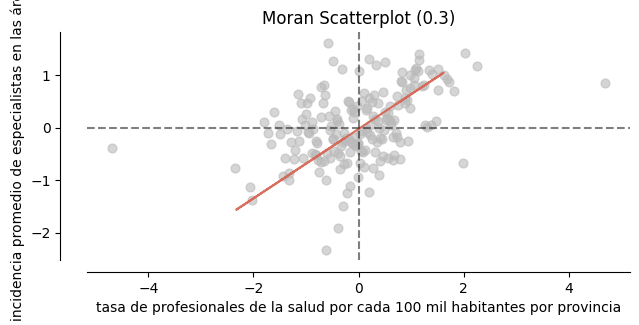

In [31]:
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

fig, ax = moran_scatterplot(moranPer)
ax.set_xlabel('tasa de profesionales de la salud por cada 100 mil habitantes por provincia')
ax.set_ylabel('tasa de incidencia promedio de especialistas en las áreas vecinas ')

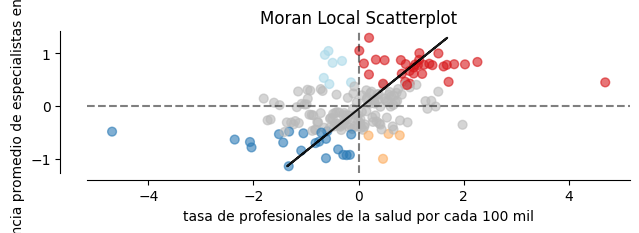

In [36]:
# The scatterplot with local info

from esda.moran import Moran_Local

# calculate Moran_Local and plot
lisaPer = Moran_Local(y=PeryPob2022['profx100_qt'], w=w_knn,seed=666)
fig, ax = moran_scatterplot(lisaPer,p=0.05)
ax.set_xlabel('tasa de profesionales de la salud por cada 100 mil')
ax.set_ylabel('tasa de incidencia promedio de especialistas en las áreas vecinas');

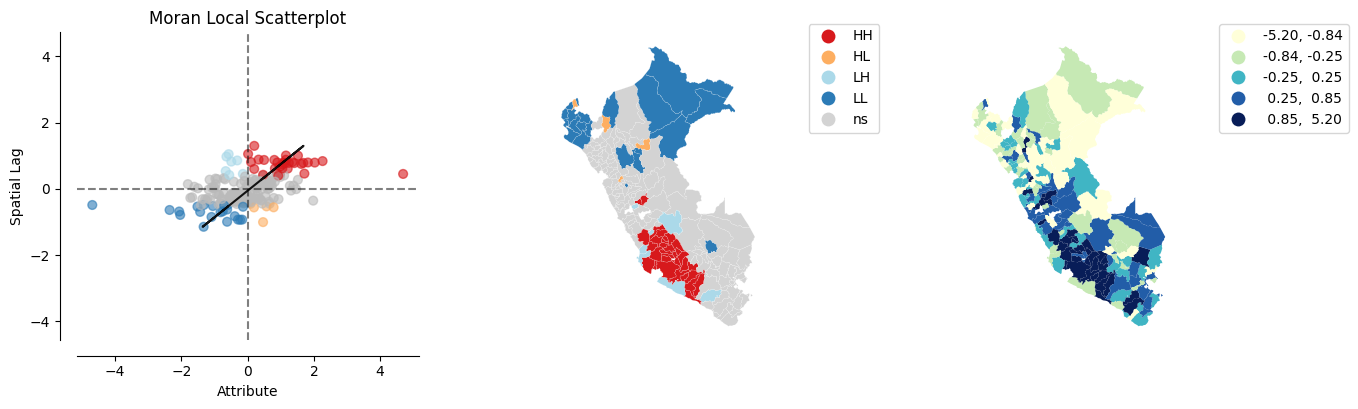

In [37]:
from splot.esda import plot_local_autocorrelation
plot_local_autocorrelation(lisaPer, PeryPob2022,'profx100_qt')
plt.show()

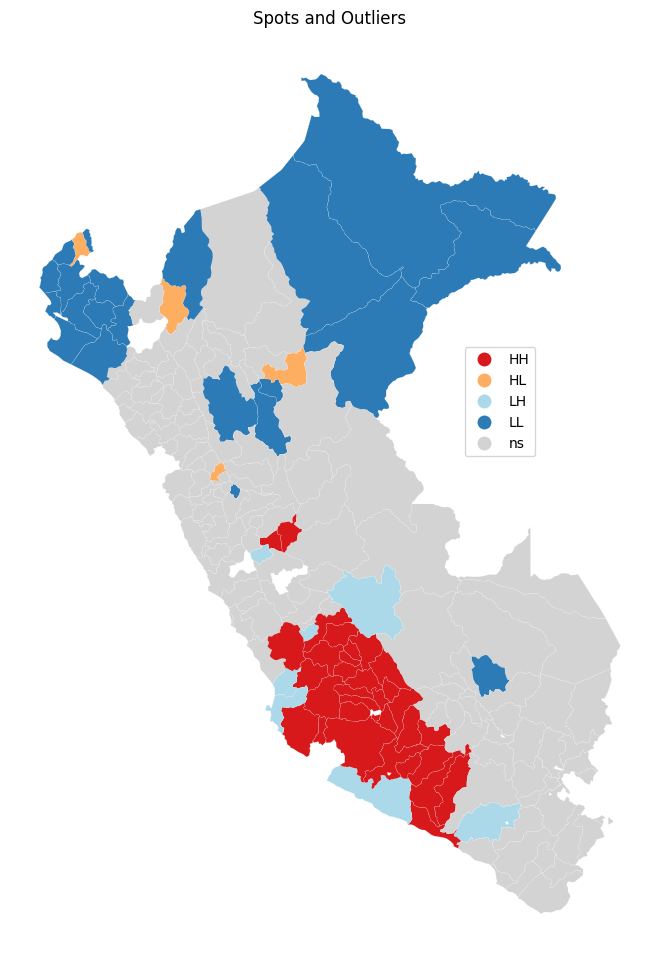

In [39]:
# the map with the spots and outliers

from splot.esda import lisa_cluster
f, ax = plt.subplots(1, figsize=(12, 12))
plt.title('Spots and Outliers')
fig = lisa_cluster(lisaPer,
                   PeryPob2022,ax=ax,
                   legend_kwds={'loc': 'center left',
                                'bbox_to_anchor': (0.7, 0.6)})